This notebook groups months Dec-Feb, Mar-May, Jun-Aug, Sep-Nov

In [1]:
import ACTDR
import TSmode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata

%matplotlib inline

In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('paper')

In [3]:
ACTDR.reset_global()
ACTDR.load_dat('DB_v02.dat')

wcvi_top = TSmode.get_topo()

> open  DB_v02.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  DB_v02.dat
> complete


In [4]:
df_casts = []
mm_casts = []
ja_casts = []
sn_casts = []

# dec - feb
df_casts.extend(TSmode.filter_CTD_list('MONTH',12))
df_casts.extend(TSmode.filter_CTD_list('MONTH',1))
df_casts.extend(TSmode.filter_CTD_list('MONTH',2))

# mar - may
mm_casts.extend(TSmode.filter_CTD_list('MONTH',3))
mm_casts.extend(TSmode.filter_CTD_list('MONTH',4))
mm_casts.extend(TSmode.filter_CTD_list('MONTH',5))

# jun - aug
ja_casts.extend(TSmode.filter_CTD_list('MONTH',6))
ja_casts.extend(TSmode.filter_CTD_list('MONTH',7))
ja_casts.extend(TSmode.filter_CTD_list('MONTH',8))

# sep - nov
sn_casts.extend(TSmode.filter_CTD_list('MONTH',9))
sn_casts.extend(TSmode.filter_CTD_list('MONTH',10))
sn_casts.extend(TSmode.filter_CTD_list('MONTH',11))

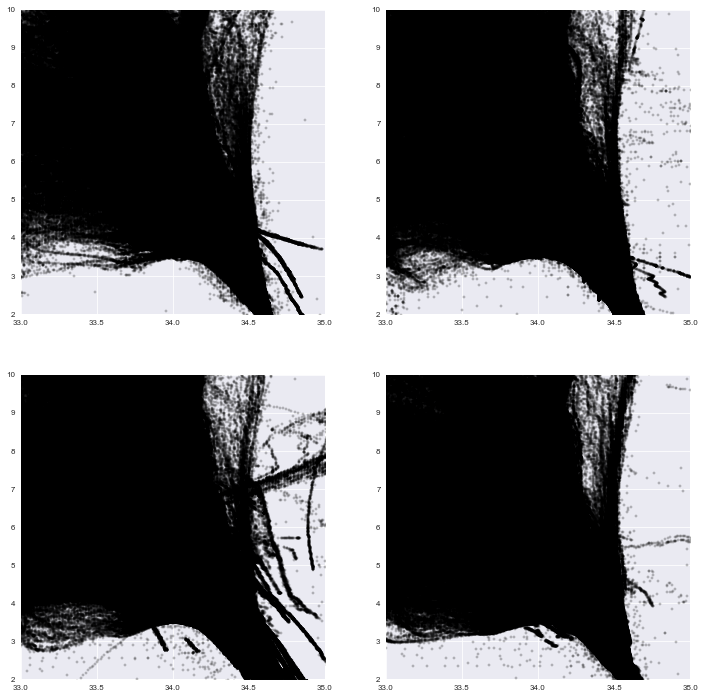

In [7]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
T = [x for k in df_casts for x in k['Temperature']]
S = [x for k in df_casts for x in k['Salinity']]
plt.plot(S,T,'.k',alpha=0.25)
plt.xlim((33,35))
plt.ylim((2,10))

plt.subplot(2,2,2)
T = [x for k in mm_casts for x in k['Temperature']]
S = [x for k in mm_casts for x in k['Salinity']]
plt.plot(S,T,'.k',alpha=0.25)
plt.xlim((33,35))
plt.ylim((2,10))

plt.subplot(2,2,3)
T = [x for k in ja_casts for x in k['Temperature']]
S = [x for k in ja_casts for x in k['Salinity']]
plt.plot(S,T,'.k',alpha=0.25)
plt.xlim((33,35))
plt.ylim((2,10))

plt.subplot(2,2,4)
T = [x for k in sn_casts for x in k['Temperature']]
S = [x for k in sn_casts for x in k['Salinity']]
plt.plot(S,T,'.k',alpha=0.25)
plt.xlim((33,35))
plt.ylim((2,10))

plt.show()

> using  10859  cast data
> using  21160  cast data
> using  24456  cast data
> using  16550  cast data


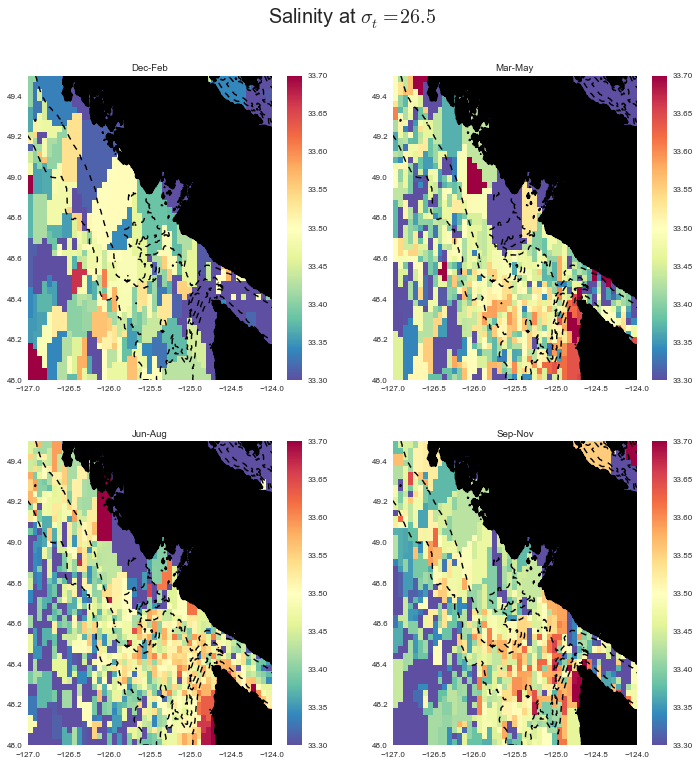

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(df_casts,26.5,'Salinity',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((33.3,33.7))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Dec-Feb')

plt.subplot(2,2,2)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(mm_casts,26.5,'Salinity',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((33.3,33.7))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Mar-May')

plt.subplot(2,2,3)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ja_casts,26.5,'Salinity',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((33.3,33.7))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Jun-Aug')

plt.subplot(2,2,4)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(sn_casts,26.5,'Salinity',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((33.3,33.7))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Sep-Nov')

plt.suptitle(r'Salinity at $\sigma_t = 26.5$',fontsize=20)
plt.show()

> using  10914  cast data
> using  21320  cast data
> using  24573  cast data
> using  16626  cast data


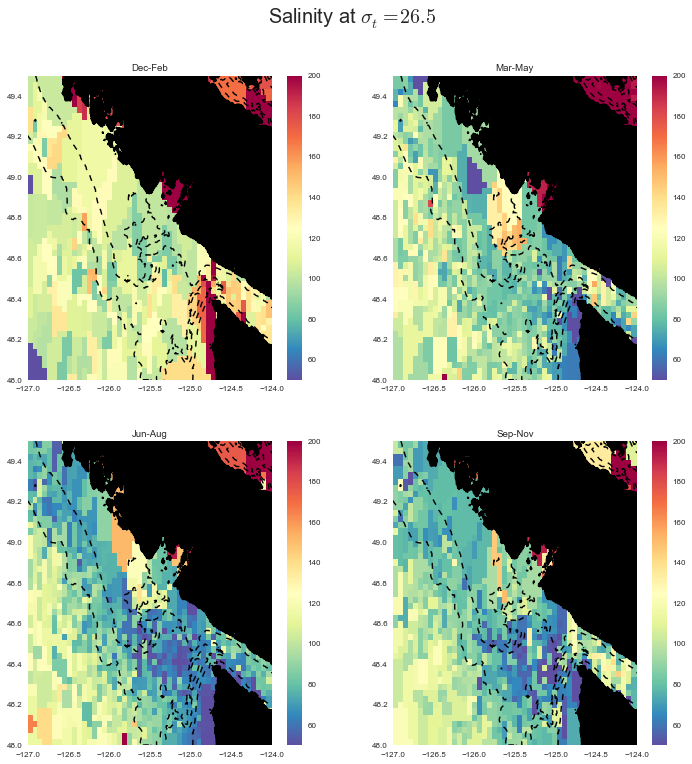

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(df_casts,26.5,'Depth',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((50,200))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Dec-Feb')

plt.subplot(2,2,2)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(mm_casts,26.5,'Depth',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((50,200))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Mar-May')

plt.subplot(2,2,3)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ja_casts,26.5,'Depth',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((50,200))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Jun-Aug')

plt.subplot(2,2,4)
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(sn_casts,26.5,'Depth',[-127,-124],[48,49.5])
plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((50,200))
plt.colorbar()
plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
plt.xlim((-127,-124))
plt.ylim((48,49.5))
plt.title('Sep-Nov')

plt.suptitle(r'Salinity at $\sigma_t = 26.5$',fontsize=20)
plt.show()